In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import chardet

## Data Initialization

In [ ]:
uploaded = files.upload()

Saving political_social_media_half_cleaned.csv to political_social_media_half_cleaned.csv


In [ ]:
df = pd.read_csv('political_social_media_half_cleaned.csv', encoding='ISO-8859-1')
df.head()

,_unit_id,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,message:confidence,id,label,source,text
0,766192484,1,8/4/2015 21:17,national,1.0,partisan,1.0,policy,1.0,3.83E+17,From: Trey Radel (Representative from Florida),twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,1,8/4/2015 21:20,national,1.0,partisan,1.0,attack,1.0,3.11E+17,From: Mitch McConnell (Senator from Kentucky),twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,1,8/4/2015 21:14,national,1.0,neutral,1.0,support,1.0,3.39E+17,From: Kurt Schrader (Representative from Oregon),twitter,Please join me today in remembering our fallen...
3,766192487,1,8/4/2015 21:08,national,1.0,neutral,1.0,policy,1.0,2.99E+17,From: Michael Crapo (Senator from Idaho),twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,1,8/4/2015 21:26,national,1.0,partisan,1.0,policy,1.0,4.08E+17,From: Mark Udall (Senator from Colorado),twitter,.@amazon delivery #drones show need to update ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             5000 non-null   int64  
 1   _trusted_judgments   5000 non-null   int64  
 2   _last_judgment_at    5000 non-null   object 
 3   audience             5000 non-null   object 
 4   audience:confidence  5000 non-null   float64
 5   bias                 5000 non-null   object 
 6   bias:confidence      5000 non-null   float64
 7   message              5000 non-null   object 
 8   message:confidence   5000 non-null   float64
 9   id                   5000 non-null   object 
 10  label                5000 non-null   object 
 11  source               5000 non-null   object 
 12  text                 5000 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 507.9+ KB


In [ ]:
df.isnull().sum()

,0
_unit_id,0
_trusted_judgments,0
_last_judgment_at,0
audience,0
audience:confidence,0
bias,0
bias:confidence,0
message,0
message:confidence,0
id,0


## Data Cleaning

### Splitting up the label column (really author) - ultimately will be dropped

In [ ]:
df['cleaned_label'] = df['label'].str.replace('From: ', '', regex=False)

In [ ]:
df['cleaned_label'].head()

,cleaned_label
0,Trey Radel (Representative from Florida)
1,Mitch McConnell (Senator from Kentucky)
2,Kurt Schrader (Representative from Oregon)
3,Michael Crapo (Senator from Idaho)
4,Mark Udall (Senator from Colorado)


In [ ]:
df[['Name', 'details']] = df['cleaned_label'].str.split(' \(', expand=True)

In [ ]:
s = "Representative from Florida)"
s = s.replace(' ', '').replace(')', '')
print(s)

RepresentativefromFlorida


In [ ]:
df['details'] = df['details'].str.replace(" ", "").str.replace(")", "")
df['details'].head()

,details
0,RepresentativefromFlorida
1,SenatorfromKentucky
2,RepresentativefromOregon
3,SenatorfromIdaho
4,SenatorfromColorado


In [ ]:
df[['government_standing', 'state']] = df['details'].str.split('from', expand=True)
df[['government_standing', 'state']].head()

,government_standing,state
0,Representative,Florida
1,Senator,Kentucky
2,Representative,Oregon
3,Senator,Idaho
4,Senator,Colorado


In [ ]:
df.drop(labels=['label', 'cleaned_label', 'details'], axis=1, inplace=True)

In [ ]:
df['name'] = df['Name']
df.drop(labels=['Name'], axis=1, inplace=True)

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             5000 non-null   int64  
 1   _trusted_judgments   5000 non-null   int64  
 2   _last_judgment_at    5000 non-null   object 
 3   audience             5000 non-null   object 
 4   audience:confidence  5000 non-null   float64
 5   bias                 5000 non-null   object 
 6   bias:confidence      5000 non-null   float64
 7   message              5000 non-null   object 
 8   message:confidence   5000 non-null   float64
 9   source               5000 non-null   object 
 10  text                 5000 non-null   object 
 11  government_standing  5000 non-null   object 
 12  state                5000 non-null   object 
 13  name                 5000 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 547.0+ KB


In [ ]:
df.drop(labels=['_unit_id', '_trusted_judgments', '_last_judgment_at', 'audience:confidence', 'bias:confidence', 'message:confidence'],
        axis=1, inplace=True)

In [ ]:
df.head()

,audience,bias,message,source,text,government_standing,state,name
0,national,partisan,policy,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,Representative,Florida,Trey Radel
1,national,partisan,attack,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...,Senator,Kentucky,Mitch McConnell
2,national,neutral,support,twitter,Please join me today in remembering our fallen...,Representative,Oregon,Kurt Schrader
3,national,neutral,policy,twitter,RT @SenatorLeahy: 1st step toward Senate debat...,Senator,Idaho,Michael Crapo
4,national,partisan,policy,twitter,.@amazon delivery #drones show need to update ...,Senator,Colorado,Mark Udall


<Axes: xlabel='source', ylabel='count'>

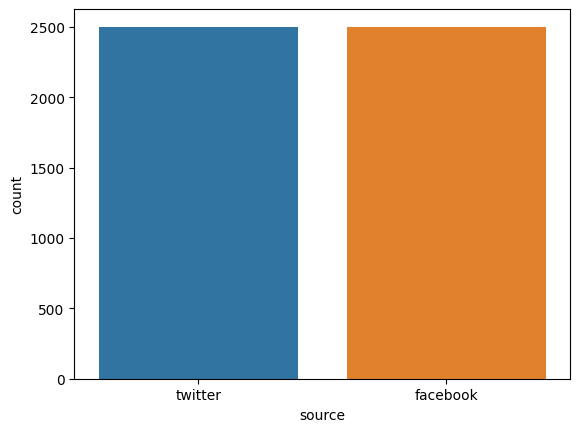

In [ ]:
sns.countplot(x='source', data=df, hue='source')

<Axes: xlabel='government_standing', ylabel='count'>

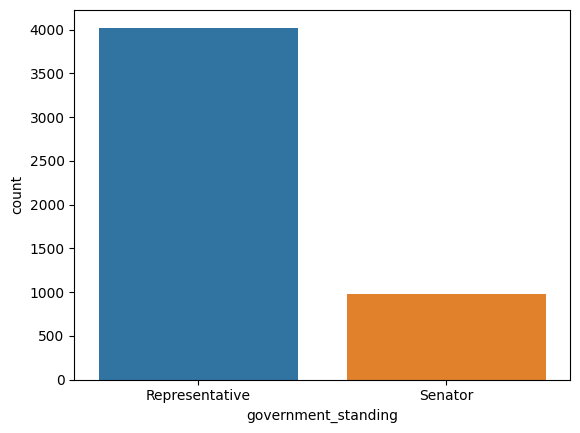

In [ ]:
sns.countplot(x='government_standing', data=df, hue='government_standing')

<Axes: xlabel='state', ylabel='count'>

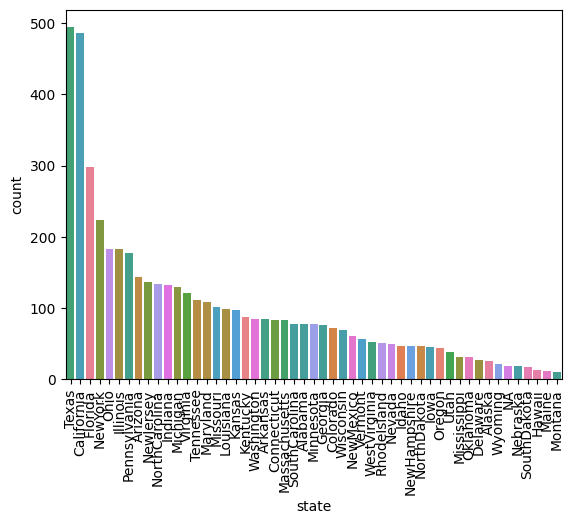

In [ ]:
plt.xticks(rotation=90)
sns.countplot(x='state', data=df, hue='state', order=df['state'].value_counts().index)

In [ ]:
df.countplot(data=df, x='bias')

In [ ]:
df.drop(labels=['state', 'government_standing', 'name', 'source', 'audience'], axis=1, inplace=True)

In [ ]:
df.head()

,bias,message,text
0,partisan,policy,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,partisan,attack,VIDEO - #Obamacare: Full of Higher Costs and ...
2,neutral,support,Please join me today in remembering our fallen...
3,neutral,policy,RT @SenatorLeahy: 1st step toward Senate debat...
4,partisan,policy,.@amazon delivery #drones show need to update ...


In [ ]:
# Pickle df and download
df.to_pickle('sm_pickle.pkl')
files.download('sm_pickle.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Dataset 1 Checkpoint

In [ ]:
pd.set_option('max_colwidth', 150)
df = pd.read_pickle('sm_pickle.pkl')

In [ ]:
df.head()

,bias,message,text
0,partisan,policy,RT @nowthisnews: Rep. Trey Radel (R- #FL) slams #Obamacare. #politics https://t.co/zvywMG8yIH
1,partisan,attack,VIDEO - #Obamacare: Full of Higher Costs and Broken Promises: http://t.co/dn3vzqIrWF
2,neutral,support,Please join me today in remembering our fallen heroes and honoring the men and women currently in military service for their sacrifices.
3,neutral,policy,RT @SenatorLeahy: 1st step toward Senate debate on Leahy-Crapo #VAWA bill is the SenateÛªs procedural vote today at 5:30 pm
4,partisan,policy,.@amazon delivery #drones show need to update law to promote #innovation &amp; protect #privacy. My #UAS bill does that: http://t.co/l9ta5SKq6u


## Label Encoding Dataset 1

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

# Label encode bias
df['bias'] = le.fit_transform(df['bias'])
df.head()

,bias,message,text
0,1,policy,RT @nowthisnews: Rep. Trey Radel (R- #FL) slams #Obamacare. #politics https://t.co/zvywMG8yIH
1,1,attack,VIDEO - #Obamacare: Full of Higher Costs and Broken Promises: http://t.co/dn3vzqIrWF
2,0,support,Please join me today in remembering our fallen heroes and honoring the men and women currently in military service for their sacrifices.
3,0,policy,RT @SenatorLeahy: 1st step toward Senate debate on Leahy-Crapo #VAWA bill is the SenateÛªs procedural vote today at 5:30 pm
4,1,policy,.@amazon delivery #drones show need to update law to promote #innovation &amp; protect #privacy. My #UAS bill does that: http://t.co/l9ta5SKq6u


## Text Preparation on Dataset 1

In [ ]:
import re
import string

def clean_text_round1(text):
  '''
  Make text lowercase,
  remove punctuation and
  remove words containing numbers.
  '''
  text = text.lower() # Lowercase
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # removing punctuation
  text = re.sub('\w*\d\w*', '', text) # Remove numbers
  return text

In [ ]:
df['text'] = df['text'].apply(clean_text_round1)

In [ ]:
df['text']

,text
0,rt nowthisnews rep trey radel r fl slams obamacare politics
1,video obamacare full of higher costs and broken promises
2,please join me today in remembering our fallen heroes and honoring the men and women currently in military service for their sacrifices
3,rt senatorleahy step toward senate debate on leahycrapo vawa bill is the senateûªs procedural vote today at pm
4,amazon delivery drones show need to update law to promote innovation amp protect privacy my uas bill does that
...,...
4995,i applaud governor perryûªs recent decision to deploy the national guard along our porous southern border the governor is doing what is best for ...
4996,today i voted in favor of hr financial services and general government appropriations act the bill stops the irs from implementing obamacare pr...
4997,taken from posted wokv interview congressman yoho says the decision to release the detainees in exchange for a soldier the us military says walk...
4998,join me next week for a town hall in ocala ill be there to answer any questions you might have


In [ ]:
def clean_text_round2(text):
  '''
  Remove any non-ascii characters
  Remove additional punction
  Remove any new lines
  '''
  text = re.sub(r'[^\x00-\x7F]+', '', text)
  text = re.sub('[’‘’“”…]', '', text)
  text = re.sub('\n', '', text)
  return text

In [ ]:
df['text'] = df['text'].apply(clean_text_round2)

In [ ]:
df.head()

,bias,message,text
0,1,policy,rt nowthisnews rep trey radel r fl slams obamacare politics
1,1,attack,video obamacare full of higher costs and broken promises
2,0,support,please join me today in remembering our fallen heroes and honoring the men and women currently in military service for their sacrifices
3,0,policy,rt senatorleahy step toward senate debate on leahycrapo vawa bill is the senates procedural vote today at pm
4,1,policy,amazon delivery drones show need to update law to promote innovation amp protect privacy my uas bill does that


In [ ]:
def check_non_alphanumeric(text):
  return bool(re.search(r'[^\x00-\x7F\w\s]', text))

In [ ]:
df['has_non_alphanumeric'] = df['text'].apply(check_non_alphanumeric)

In [ ]:
df['has_non_alphanumeric'].value_counts()

,count
has_non_alphanumeric,
False,5000


In [ ]:
df.drop('has_non_alphanumeric', axis=1, inplace=True)

## Data Organization

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Download Important nltk files
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Removing stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  tokens = word_tokenize(text)
  cleaned_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
  return ' '.join(cleaned_tokens)

In [ ]:
saved_text_state = df['text']
df['text'] = df['text'].apply(remove_stopwords)

### Word Stemming

In [ ]:
# Word stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_words(text):
  tokens = word_tokenize(text)
  stemmed_tokens = [stemmer.stem(token) for token in tokens if token.isalnum()]
  return ' '.join(stemmed_tokens)

In [ ]:
df['text'] = df['text'].apply(stem_words)

### Additional Stop Words

In [ ]:
tokens = []
for text in df['text']:
  words = word_tokenize(text)
  words = [word for word in words if word.isalnum() and word not in stop_words]  # Remove punctuation & stopwords
  tokens.extend(words)

In [ ]:
word_counts = Counter(tokens)

# Top 30 words
most_common_words = word_counts.most_common(30)
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

common_words_df

,Word,Frequency
0,today,716
1,us,440
2,house,434
3,amp,409
4,great,395
5,new,362
6,bill,324
7,act,296
8,congress,293
9,veterans,290


In [ ]:
additional_stop_words = ['us', 'today', 'amp', 'day', 'time', 'one', 'rt', 'im', 'get', 'would', 'week', 'year', 'years']

In [ ]:
def remove_additional_stop_words(text):
  tokens = word_tokenize(text)
  cleaned_tokens = [word for word in tokens if word.isalnum() and word not in stop_words and word not in additional_stop_words]
  return ' '.join(cleaned_tokens)

In [ ]:
df['text'] = df['text'].apply(remove_additional_stop_words)

In [ ]:
tokens = []
for text in df['text']:
  words = word_tokenize(text)
  words = [word for word in words if word.isalnum() and word not in stop_words]  # Remove punctuation & stopwords
  tokens.extend(words)

In [ ]:
word_counts = Counter(tokens)

# Top 30 words
most_common_words = word_counts.most_common(50)
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

common_words_df

,Word,Frequency
0,house,434
1,great,395
2,new,362
3,bill,324
4,act,296
5,congress,293
6,veterans,290
7,president,286
8,work,274
9,help,261


## EDA

In [ ]:
df.head()

,bias,message,text
0,1,policy,nowthisnew rep trey radel r fl slam obamacar polit
1,1,attack,video obamacar full higher cost broken promis
2,0,support,pleas join rememb fallen hero honor men women current militari servic sacrific
3,0,policy,senatorleahi step toward senat debat leahycrapo vawa bill senat procedur vote pm
4,1,policy,amazon deliveri drone show need updat law promot innov protect privaci ua bill


In [ ]:
df[df['bias'] == 1]

,bias,message,text
0,1,policy,nowthisnew rep trey radel r fl slam obamacar polit
1,1,attack,video obamacar full higher cost broken promis
4,1,policy,amazon deliveri drone show need updat law promot innov protect privaci ua bill
5,1,information,call usdotfra releas info inspect casseltonderail review qualiti rail
9,1,support,great ope pre clinton sign fmla yr ago import law protect worker hoyerheadlin
...,...,...,...
4968,1,policy,bank lobbyist success convinc congress remov bankruptci protect privat student loan borrow bank committe hear ask top bank lobbyist struggl studen...
4975,1,policy,proud cosponsor hr larg capac ammunit feed devic act ban sale magazin use fire dozen round per minut read bill
4987,1,policy,presid state union address state dont expect convinc republican friend merit law obamacareso specif plan cut cost cover peopl increas choic tell a...
4995,1,support,applaud governor perri recent decis deploy nation guard along porou southern border governor best state peopl repres support cours action along me...


In [ ]:
# Create word clouds of label 1 vs label 0 data
from wordcloud import WordCloud
import matplotlib.pyplot as plt

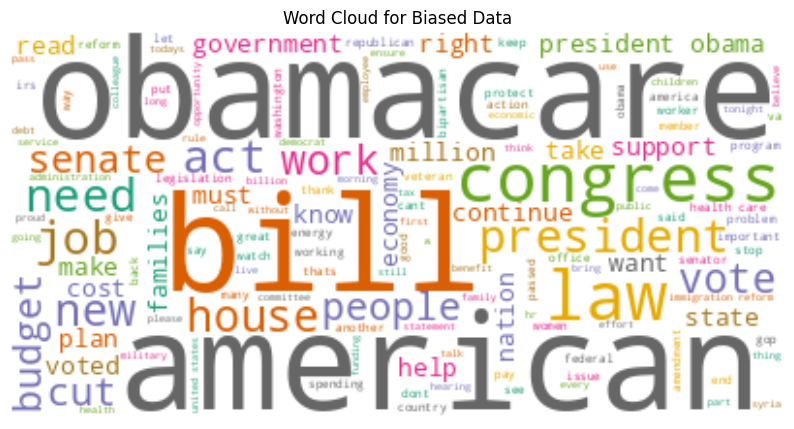

In [ ]:
# Create a word cloud for label 1
wordcloud1 = WordCloud(colormap='Dark2', background_color='white').generate(df[df['bias'] == 1]['text'].str.cat(sep=' '))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Biased Data')
plt.show()



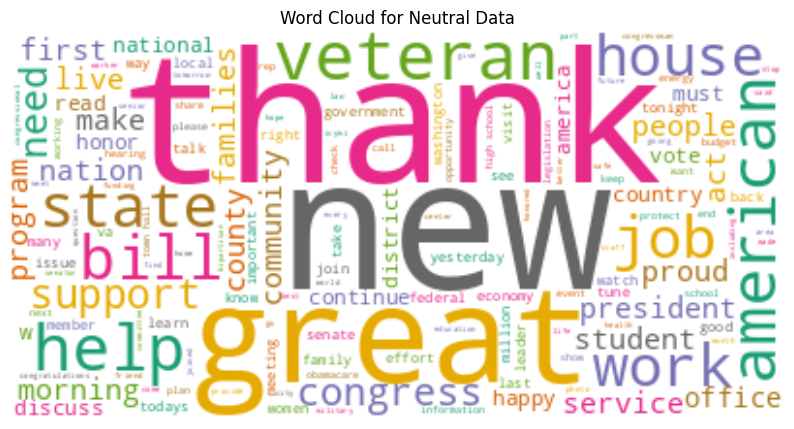

In [ ]:
# Create a word cloud for label 0
wordcloud1 = WordCloud(colormap='Dark2', background_color='white').generate(df[df['bias'] == 0]['text'].str.cat(sep=' '))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Data')
plt.show()

In [ ]:
# Pickle cleaned dataframe
pickle = df.to_pickle('cleaned_social_media_df.pkl')

In [ ]:
# download pickle
files.download('cleaned_social_media_df.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>